# <span style="color:red"> Numerical Simulation Laboratory (NSL) </span>

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

<h1><font color='ForestGreen'>ESERCITAZIONE 3: EQUAZIONI DIFFERENZIALI STOCASTICHE E PREZZAMENTO OPZIONI EUROPEE </font> </h1>

<h3><font color = 'LightGreen'>Intro:</font></h3>

La teoria di Black-Scholes offre una soluzione analitica per il calcolo dell'opzione europea, altresi' note plein-vanilla options per
la loro semplicita'. Opzioni non eurepee vengono denominate come esotiche, tra cui si hanno: le american option, le bermudan option, le asian option, le loopback option.
L'assunzione fondante da cui prende corpo l'intero studio delle opzioni europee e' che l'evoluzione del prezzo sia governata dal moto browniano geometrico, il quale e' caratterizzato da 2 parametri: tasso di rischio r  e volatilità $\sigma$.

L'opzione e' una forma di contratto in cui il writer garantisce di vendere o comprare un determinato prodotto nel futuro ad un prezzo fissato. 
l'holder comprando l'opzione guadagna il diritto di poter comprare tale prodotto a quel prezzo. si distinguono due casi:
Si ha la "call" nel caso in cui per il'holder è conveniente comprare il prodotto dal venditore 
poichè il prezzo è minore di quello di mercato. Se dovesse verificarsi il contrario, si parlerebbe di put. 
Il problema affrontato da chi si occupa di finanza quantitativa e fa risk managment e' determinare un giusto valore dell'opzione.
La teoria di cui sopra dà tale risposta ma spesso le ipotesi non sono verificate, tipo: code non gaussiana e convergenza lenta; effetti di memoria; dipendenza dal tempo della volatilita'... 
Motivo per cui si introducono tecniche Monte Carlo per ottenere tali risultati.

Si riporta anzitutto la soluzione analitica di Black-Scholes per t<T:

Black-Scholes <span style="color:blue"> soluzione anatica </span> per prezzi al tempo: t<T:
-  Prezzamento opzioni-Call europee:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- Prezzamento opzioni-Put europee:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$
dove $d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
e' la funzione cumulativa gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$


Usando i seguenti parametri: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

calcolato al tempo $t=0$ **via Monte Carlo** per European call-option price, $C[S(0),0]$, per put-option price, $P[S(0),0]$:

In [5]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364



Alla luce di questi risultati teorici, ci si propone di effettuare un totale di due simulazione MC: una in cui si campiona direttamente; l'altra, 
possibile in questa circostanza, in cui si campiona tutto il percorso stocastico a tempi discreti.


<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Nel primo caso, ricordando $S\sim GBM(\mu,\sigma^2)$, con valore iniale $S(0)$, si ha
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    dove $W(t)\sim\mathcal{N}(0,t)$.
    nel secondo, invece, siccome gli incrementi di $W$ sono indipendenti e distribuiti normalmente, si puo' effettuare pure una procedura di campionament ricrosivo tramite discretizzazione del tempo: $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$$
                                                                                                                                                                                                                                                        
si osservi che non e' presente errore di discrettizzazione, in quanto i punti campionati seguono la corretta distribuzione dell'equazione differenziale
stocastica: questi tempi invero sono si' sul continuo, ma tale procedura di discretizzazione vale per un qualsiasi partizionamento dell'intervallo
        temporale.
                                                                                                                                                
</p>

<h2><font color = 'LimeGreen'>ESERCIZIO 2.1: Prezzamento Opzioni</font></h2>

<h3><font color = 'LightGreen'>Campionamento Diretto</font></h3>

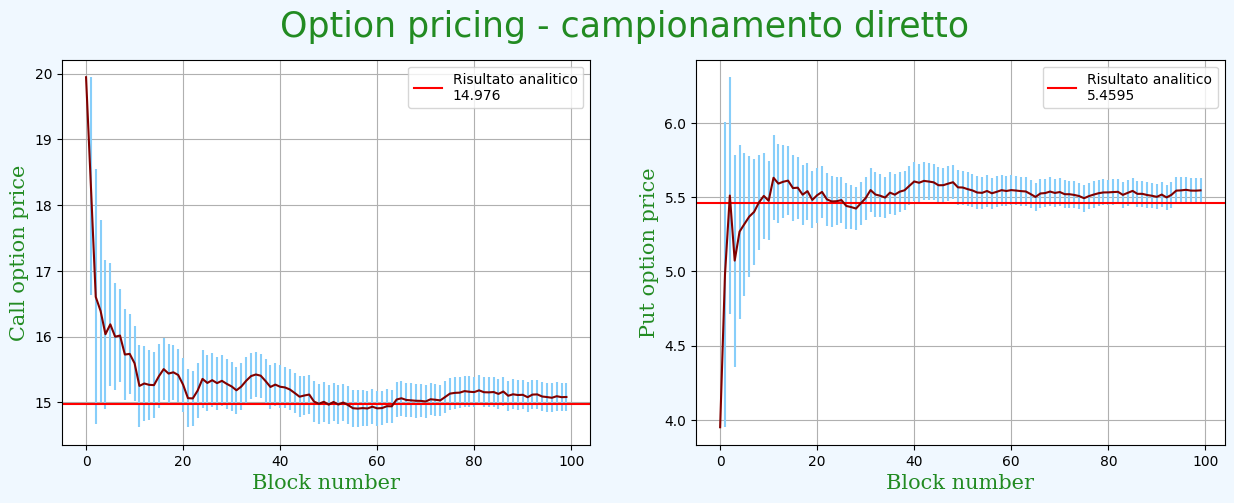

In [6]:
N = 100
    # uso l'ordinamento da 1 a N

fig=plt.figure(figsize=(15,5), facecolor = "AliceBlue")
plt.suptitle("Option pricing - campionamento diretto", fontsize = 25, color = "ForestGreen")

plt.subplot(1,2,1)
x, aveC, errC = np.loadtxt("EX_3.1_A/call.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, aveC, yerr = errC, color = "Maroon", ecolor = "LightSkyBlue")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.ylabel('Call option price', fontdict = font)
plt.xlabel('Block number', fontdict = font)
plt.grid(True)
plt.axhline(y=14.975790778311286, color = 'r', linestyle = '-', label = "Risultato analitico\n14.976")
plt.legend()

plt.subplot(1,2,2)
aveP, errP = np.loadtxt("EX_3.1_A/put.dat", usecols=(1,2), delimiter=' ', unpack='true')
plt.errorbar(x, aveP, yerr = errP, color = "Maroon", ecolor = "LightSkyBlue")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.ylabel('Put option price', fontdict = font)
plt.xlabel('Block number', fontdict = font)
plt.grid(True)
plt.axhline(y=5.4595325819072364, color = 'r', linestyle = '-', label = "Risultato analitico\n5.4595")
plt.legend()

plt.show()


In [8]:
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('RISULTATO FINALE CALL: ')
print(aveC[-1])
print('INCERTEZZA : ')
print(errC[-1])
print("IN SINTESI : ")
print(aveC[-1], '±', f"{errC[-1]:.4f}")
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('RISULTATO FINALE: Put: ')
print(aveP[-1])
print('INCERTEZZA : ')
print(errP[-1])
print("IN SINTESI : ")
print(aveP[-1], '±', f"{errP[-1]:.5f}")
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

RISULTATO FINALE CALL: 
15.0817
INCERTEZZA : 
0.213464
IN SINTESI : 
15.0817 ± 0.2135

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

RISULTATO FINALE: Put: 
5.54663
INCERTEZZA : 
0.0861599
IN SINTESI : 
5.54663 ± 0.08616

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



<h3><font color = 'LightGreen'>Campionamento Discreto</font></h3>

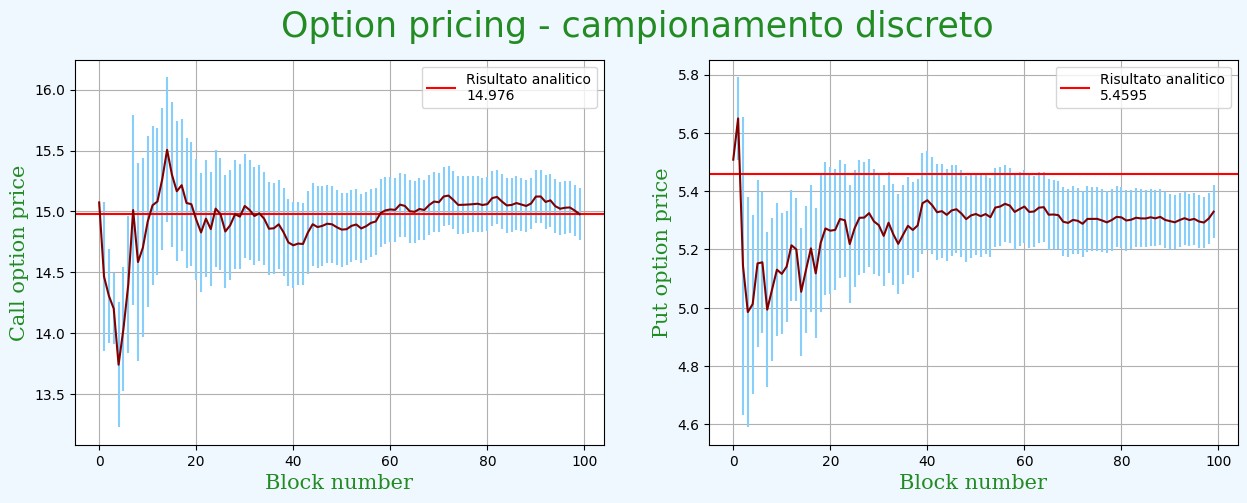

In [15]:
N = 100
     # uso l'ordinamento da 1 a N

fig=plt.figure(figsize=(15,5), facecolor = "AliceBlue")
plt.suptitle("Option pricing - campionamento discreto", fontsize = 25, color = "ForestGreen")

plt.subplot(1,2,1)
x,aveC, errC = np.loadtxt("EX_3.1_B/call.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, aveC, yerr = errC, color = "Maroon", ecolor = "LightSkyBlue")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.ylabel('Call option price', fontdict = font)
plt.xlabel('Block number', fontdict = font)
plt.grid(True)
plt.axhline(y=14.975790778311286, color = 'r', linestyle = '-', label = "Risultato analitico\n14.976")
plt.legend()

plt.subplot(1,2,2)
aveP, errP = np.loadtxt("EX_3.1_B/put.dat", usecols=(1,2), delimiter=' ', unpack='true')
plt.errorbar(x, aveP, yerr = errP, color = "Maroon", ecolor = "LightSkyBlue")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.ylabel('Put option price', fontdict = font)
plt.xlabel('Block number', fontdict = font)
plt.grid(True)
plt.axhline(y=5.4595325819072364, color = 'r', linestyle = '-', label = "Risultato analitico\n5.4595")
plt.legend()

plt.show()


In [9]:
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('RISULTATO FINALE CALL: ')
print(aveC[-1])
print('INCERTEZZA : ')
print(errC[-1])
print("IN SINTESI : ")
print(aveC[-1], '±', f"{errC[-1]:.4f}")
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('RISULTATO FINALE: Put: ')
print(aveP[-1])
print('INCERTEZZA : ')
print(errP[-1])
print("IN SINTESI : ")
print(aveP[-1], '±', f"{errP[-1]:.5f}")
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

RISULTATO FINALE CALL: 
15.0817
INCERTEZZA : 
0.213464
IN SINTESI : 
15.0817 ± 0.2135

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

RISULTATO FINALE: Put: 
5.54663
INCERTEZZA : 
0.0861599
IN SINTESI : 
5.54663 ± 0.08616

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

